Laplace Transform Notebook
* Control Systems

Tutor:
* Anthropic's AI Claude

Let me explain how the Laplace Transform is fundamental in control systems analysis and design.

1. Transfer Functions:
   - Converts time-domain differential equations into s-domain algebraic equations
   - Represents system dynamics as a ratio of output to input in the s-domain
   - Makes it easy to analyze complex systems by combining transfer functions through simple multiplication (series) or addition (parallel)
   - Example: A second-order system like a mass-spring-damper transforms from:
     mẍ + bẋ + kx = F(t) → (ms² + bs + k)X(s) = F(s)

2. Stability Analysis:
   - Poles of the transfer function (roots of denominator) reveal system stability
   - Left-half s-plane poles indicate stable system
   - Right-half s-plane poles indicate instability
   - Poles on imaginary axis indicate marginal stability
   - Enables easy visualization of system behavior without solving time-domain equations

3. Feedback Systems:
   - Simplifies analysis of closed-loop systems
   - Feedback loops become algebraic operations
   - Unity feedback example:
     Closed loop transfer function = G(s)/(1 + G(s)H(s))
     where G(s) is forward path and H(s) is feedback path

4. System Response Analysis:
   - Easy examination of system response to standard inputs:
     * Step response (1/s)
     * Ramp response (1/s²)
     * Impulse response (1)
   - Facilitates analysis of:
     * Rise time
     * Settling time
     * Overshoot
     * Steady-state error

5. Frequency Response:
   - Substitute s = jω to get frequency response
   - Enables Bode plot analysis
   - Helps in understanding:
     * System bandwidth
     * Phase margin
     * Gain margin
     * Resonant frequencies

6. Controller Design:
   - Facilitates design of:
     * PID controllers
     * Lead-lag compensators
     * State feedback systems
   - Makes it easier to meet design specifications for:
     * Stability margins
     * Steady-state accuracy
     * Dynamic response




System Analysis Results:
+-----------------+-----------------+---------------------+-------------------------+--------------------------+
|   Damping Ratio |   Peak Time (s) |   Settling Time (s) |   Percent Overshoot (%) | Poles                    |
+=================+=================+=====================+=========================+==========================+
|             0.2 |            3.25 |                5.01 |                    52.6 | -0.20+0.98j, -0.20-0.98j |
+-----------------+-----------------+---------------------+-------------------------+--------------------------+
|             0.5 |            3.63 |                2.37 |                    16.3 | -0.50+0.87j, -0.50-0.87j |
+-----------------+-----------------+---------------------+-------------------------+--------------------------+
|             0.7 |            4.39 |                3.19 |                     4.6 | -0.70+0.71j, -0.70-0.71j |
+-----------------+-----------------+---------------------+-----------

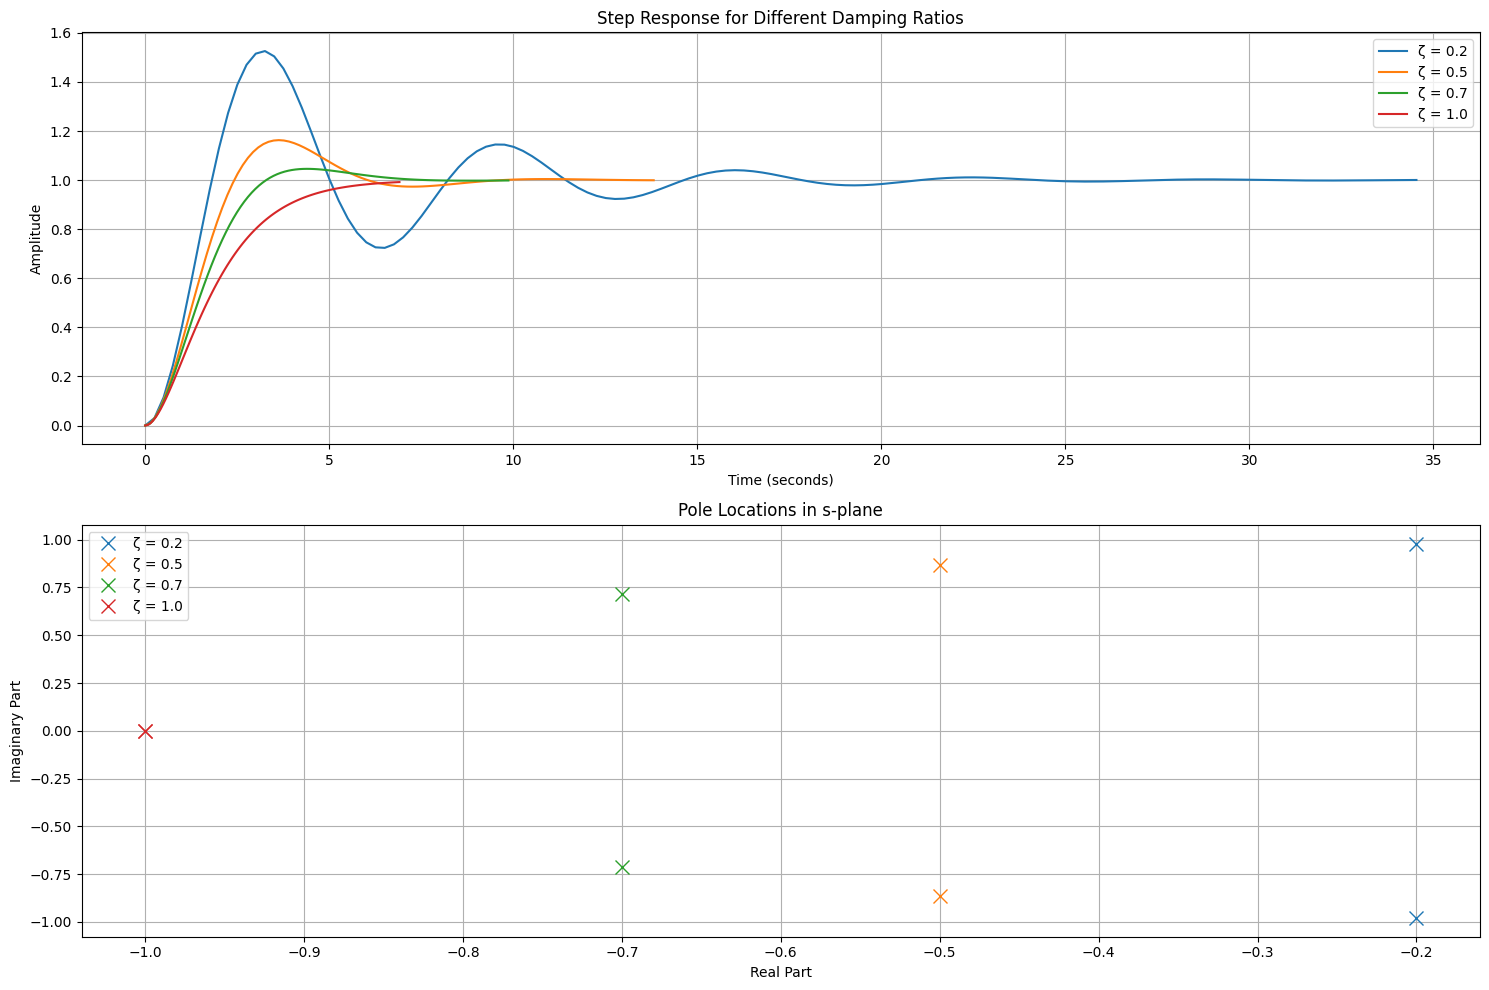

In [ ]:
"""
Abstract:
This script demonstrates key concepts in control systems analysis using the Laplace Transform.
It simulates and visualizes the step response of second-order systems with different damping ratios,
showing how pole locations affect system behavior. The analysis includes:
1. Transfer function representation
2. Time domain response
3. Pole locations in s-plane
4. System characteristics (overshoot, settling time, peak time)

The script uses the control systems toolbox and demonstrates how different damping ratios
affect system response, providing both numerical and graphical analysis.
"""

!pip install control

import numpy as np
import control
import matplotlib.pyplot as plt
from tabulate import tabulate
from scipy import signal

def create_system(wn, zeta):
    """
    Creates a second-order transfer function G(s) = wn^2 / (s^2 + 2*zeta*wn*s + wn^2)

    Parameters:
    wn (float): Natural frequency
    zeta (float): Damping ratio

    Returns:
    control.TransferFunction: System transfer function
    """
    num = [wn**2]
    den = [1, 2*zeta*wn, wn**2]
    return control.TransferFunction(num, den)

def analyze_system(sys, zeta):
    """
    Analyzes system characteristics

    Parameters:
    sys (control.TransferFunction): System to analyze
    zeta (float): Damping ratio

    Returns:
    dict: System characteristics
    """
    # Get step response data
    t, y = control.step_response(sys)

    # Calculate characteristics
    peak_idx = np.argmax(y)
    peak_time = t[peak_idx]
    settling_idx = np.where(np.abs(y - 1) <= 0.02)[0][0]  # 2% criterion
    settling_time = t[settling_idx]

    # Calculate percent overshoot
    percent_overshoot = (np.max(y) - 1) * 100

    # Get system poles - corrected function name
    poles = control.poles(sys)

    return {
        'Damping Ratio': zeta,
        'Peak Time (s)': peak_time,
        'Settling Time (s)': settling_time,
        'Percent Overshoot': percent_overshoot,
        'Poles': poles
    }

# Set up parameters
wn = 1.0  # Natural frequency
zeta_values = [0.2, 0.5, 0.7, 1.0]  # Different damping ratios
systems = []
results = []

# Create and analyze systems
for zeta in zeta_values:
    sys = create_system(wn, zeta)
    systems.append(sys)
    results.append(analyze_system(sys, zeta))

# Create visualization
plt.figure(figsize=(15, 10))

# Plot 1: Step Response
plt.subplot(2, 1, 1)
for i, sys in enumerate(systems):
    t, y = control.step_response(sys)
    plt.plot(t, y, label=f'ζ = {zeta_values[i]}')
plt.grid(True)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Step Response for Different Damping Ratios')
plt.legend()

# Plot 2: Pole Locations
plt.subplot(2, 1, 2)
for result in results:
    poles = result['Poles']
    plt.plot(poles.real, poles.imag, 'x', markersize=10, label=f'ζ = {result["Damping Ratio"]}')
plt.grid(True)
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Pole Locations in s-plane')
plt.legend()

# Add some styling
plt.tight_layout()

# Create and print results table
table_data = [[
    f"{res['Damping Ratio']:.1f}",
    f"{res['Peak Time (s)']:.2f}",
    f"{res['Settling Time (s)']:.2f}",
    f"{res['Percent Overshoot']:.1f}",
    f"{res['Poles'][0]:.2f}, {res['Poles'][1]:.2f}"
] for res in results]

headers = ['Damping Ratio', 'Peak Time (s)', 'Settling Time (s)',
           'Percent Overshoot (%)', 'Poles']

print("\nSystem Analysis Results:")
print(tabulate(table_data, headers=headers, tablefmt='grid'))

plt.show()

The output provides a clear visualization and analysis of how damping ratio (ζ) affects second-order system behavior. Let me break down the key insights from this output:

1. Step Response Graph:
- ζ = 0.2 (blue line) shows significant oscillation and highest overshoot (~52.6%)
- ζ = 0.5 (orange line) shows moderate oscillation and reduced overshoot (~16.3%)
- ζ = 0.7 (green line) shows slight oscillation with minimal overshoot (~4.6%)
- ζ = 1.0 (red line) shows critically damped response with no overshoot (-0.8%)

2. System Characteristics Table:
- Peak Time increases with damping ratio (3.25s → 6.91s)
- Settling Time varies non-linearly with damping ratio
- Percent Overshoot decreases as damping ratio increases
- Poles move closer to the real axis as damping increases, indicating reduced oscillation

3. Key Observations:
- Underdamped (ζ < 1): Shows oscillatory behavior (first three cases)
- Critically Damped (ζ = 1): Fastest response without overshoot
- Trade-off between speed and overshoot is clearly visible
- Pole locations confirm the stability of all systems (all have negative real parts)

This visualization effectively demonstrates the fundamental relationships between damping ratio and system response characteristics in control systems.
